### Loading Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
data1 = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv", parse_dates=True)
data2 = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv", parse_dates=True)

### Descriptive Statistics

In [3]:
data1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [4]:
data1.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
13302,Zimbabwe,ZWE,2021-04-18,314446.0,278583.0,35863.0,2545.0,12993.0,2.12,1.87,0.24,874.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385323812...
13303,Zimbabwe,ZWE,2021-04-19,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,0.25,792.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385323812...
13304,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385323812...
13305,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,0.25,681.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385323812...
13306,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385323812...


In [5]:
data1['date'] = pd.to_datetime(data1['date'])

In [6]:
data2.head()

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649


In [7]:
data2['date'] = pd.to_datetime(data2['date'])

In [8]:
print("data 1",data1.shape, "data2", data2.shape)

data 1 (13307, 15) data2 (2562, 4)


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307 entries, 0 to 13306
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              13307 non-null  object        
 1   iso_code                             13307 non-null  object        
 2   date                                 13307 non-null  datetime64[ns]
 3   total_vaccinations                   7917 non-null   float64       
 4   people_vaccinated                    7238 non-null   float64       
 5   people_fully_vaccinated              5238 non-null   float64       
 6   daily_vaccinations_raw               6622 non-null   float64       
 7   daily_vaccinations                   13081 non-null  float64       
 8   total_vaccinations_per_hundred       7917 non-null   float64       
 9   people_vaccinated_per_hundred        7238 non-null   float64       
 10  people_ful

In [10]:
data1.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5390
people_vaccinated                      6069
people_fully_vaccinated                8069
daily_vaccinations_raw                 6685
daily_vaccinations                      226
total_vaccinations_per_hundred         5390
people_vaccinated_per_hundred          6069
people_fully_vaccinated_per_hundred    8069
daily_vaccinations_per_million          226
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

### Dealing With Null Values

1. By deleting the null values

In [11]:
data1_del_na = data1.dropna()

In [12]:
data1_del_na.info()
# As we can see the amount of data become very small.(less than half of original data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4651 entries, 99 to 13306
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              4651 non-null   object        
 1   iso_code                             4651 non-null   object        
 2   date                                 4651 non-null   datetime64[ns]
 3   total_vaccinations                   4651 non-null   float64       
 4   people_vaccinated                    4651 non-null   float64       
 5   people_fully_vaccinated              4651 non-null   float64       
 6   daily_vaccinations_raw               4651 non-null   float64       
 7   daily_vaccinations                   4651 non-null   float64       
 8   total_vaccinations_per_hundred       4651 non-null   float64       
 9   people_vaccinated_per_hundred        4651 non-null   float64       
 10  people_ful

2. By imputting the values using simple imputer

In [13]:
data1['total_vaccinations']=data1['total_vaccinations'].fillna(data1['total_vaccinations'].mean())
data1['people_vaccinated']=data1['people_vaccinated'].fillna(data1['people_vaccinated'].mean())
data1['daily_vaccinations_raw']=data1['daily_vaccinations_raw'].fillna(data1['daily_vaccinations_raw'].mean())
data1['daily_vaccinations']=data1['daily_vaccinations'].fillna(data1['daily_vaccinations'].mean())
data1['total_vaccinations_per_hundred']=data1['total_vaccinations_per_hundred'].fillna(data1['total_vaccinations_per_hundred'].mean())
data1['people_vaccinated_per_hundred']=data1['people_vaccinated_per_hundred'].fillna(data1['people_vaccinated_per_hundred'].mean())
data1['people_fully_vaccinated_per_hundred']=data1['people_fully_vaccinated_per_hundred'].fillna(data1['people_fully_vaccinated_per_hundred'].mean())
data1['daily_vaccinations_per_million']=data1['daily_vaccinations_per_million'].fillna(data1['daily_vaccinations_per_million'].mean())

In [14]:
data2.info()
# Vaccine by manufaturer has no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            2562 non-null   object        
 1   date                2562 non-null   datetime64[ns]
 2   vaccine             2562 non-null   object        
 3   total_vaccinations  2562 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 80.2+ KB


In [15]:
data1.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.330700e+04,1.330700e+04,5.238000e+03,1.330700e+04,1.330700e+04,13307.000000,13307.000000,13307.000000,13307.000000
mean,4.325183e+06,2.903580e+06,1.385595e+06,1.269432e+05,7.371984e+04,13.956761,10.306589,5.094706,2912.016436
std,1.337842e+07,7.844220e+06,5.917575e+06,3.333800e+05,3.211785e+05,16.893061,10.746477,6.005558,4780.513623
min,0.000000e+00,0.000000e+00,1.000000e+00,-1.831400e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.232760e+05,2.431745e+05,2.208700e+04,1.546300e+04,9.435000e+02,3.640000,3.520000,3.495000,354.000000
50%,4.182027e+06,2.903580e+06,1.569640e+05,1.269432e+05,6.384000e+03,13.956761,10.306589,5.094706,1479.000000
75%,4.325183e+06,2.903580e+06,6.295110e+05,1.269432e+05,3.046900e+04,13.956761,10.306589,5.094706,3671.000000
max,2.189476e+08,1.357910e+08,8.924578e+07,7.185000e+06,5.190143e+06,199.950000,106.590000,93.360000,118759.000000


In [16]:
data2.describe()

,total_vaccinations
count,2.562000e+03
mean,4.578524e+06
std,1.489208e+07
min,0.000000e+00
25%,1.511650e+04
50%,1.307505e+05
75%,1.399125e+06
max,1.148440e+08


### Some Visualization

<AxesSubplot:>

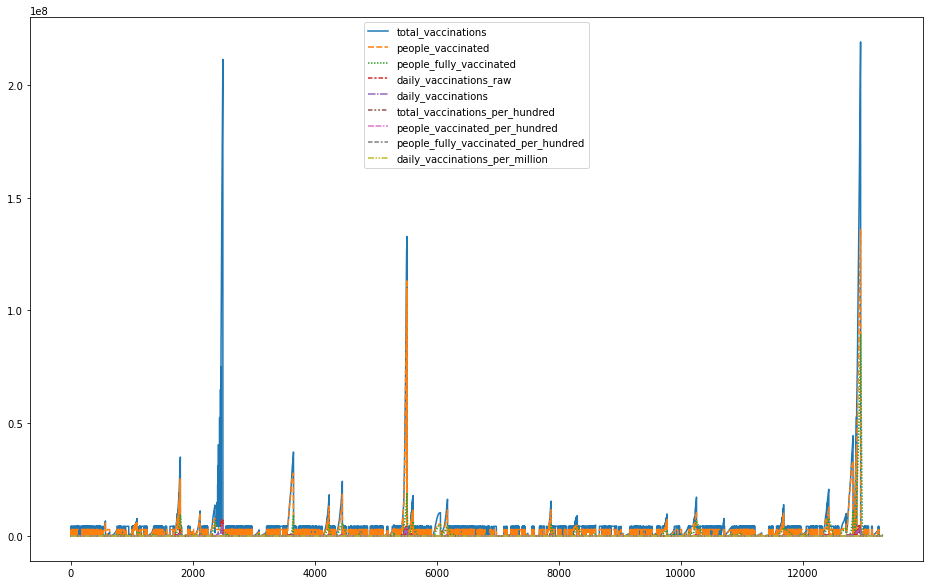

In [17]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data1)

In [18]:
data_apply = data1.groupby("country").apply(lambda df : df.loc[df.total_vaccinations.idxmax()])
data_apply
# Countries with total vaccinations

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,AFG,2021-02-23,4.325183e+06,2.903580e+06,NaN,126943.240109,1367.0,13.956761,10.306589,5.094706,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
Albania,Albania,ALB,2021-01-11,4.325183e+06,2.903580e+06,NaN,126943.240109,64.0,13.956761,10.306589,5.094706,22.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://twitter.com/gmanastirliu/status/138531...
Algeria,Algeria,DZA,2021-01-31,4.325183e+06,2.903580e+06,NaN,126943.240109,1889.0,13.956761,10.306589,5.094706,43.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
Andorra,Andorra,AND,2021-01-26,4.325183e+06,2.903580e+06,NaN,126943.240109,66.0,13.956761,10.306589,5.094706,854.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
Angola,Angola,AGO,2021-03-02,4.325183e+06,2.903580e+06,NaN,126943.240109,881.0,13.956761,10.306589,5.094706,27.0,Oxford/AstraZeneca,Ministry of Health,https://www.angop.ao/en/noticias/saude/covid-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,Venezuela,VEN,2021-02-18,4.325183e+06,2.903580e+06,NaN,126943.240109,31.0,13.956761,10.306589,5.094706,1.0,Sputnik V,Government of Venezuela,https://www.swissinfo.ch/spa/coronavirus-venez...
Vietnam,Vietnam,VNM,2021-04-22,1.286100e+05,1.286100e+05,NaN,19713.000000,9265.0,0.130000,0.130000,5.094706,95.0,Oxford/AstraZeneca,Government of Vietnam,https://nhandan.com.vn/tin-tuc-y-te/ghi-nhan-t...
Wales,Wales,OWID_WLS,2021-01-04,4.325183e+06,2.903580e+06,NaN,126943.240109,5048.0,13.956761,10.306589,5.094706,1601.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [19]:
data1['year'] = pd.DatetimeIndex(data1['date']).year
data1['month'] = pd.DatetimeIndex(data1['date']).month

<AxesSubplot:>

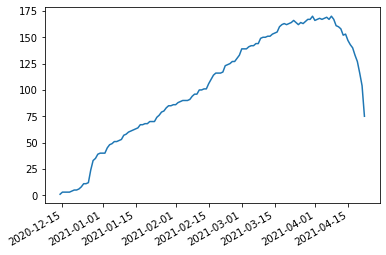

In [20]:
data1['date'].value_counts().sort_values().plot.line()

<AxesSubplot:>

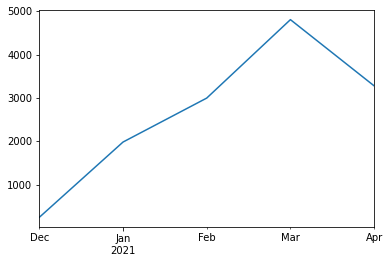

In [21]:
data1['date'].value_counts().resample('M').sum().plot.line()
# From the plot, near in march the vaccination was at peak

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

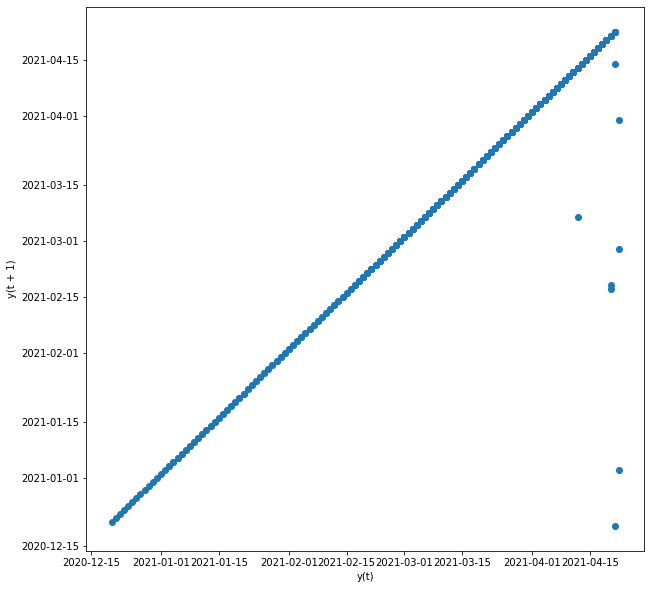

In [22]:
from pandas.plotting import lag_plot
plt.figure(figsize =(10,10))
lag_plot(data1['date'].tail(500))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


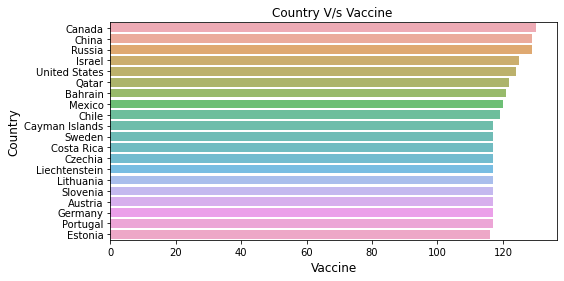

In [23]:
x=data1.groupby(['country']).count()
x=x.sort_values(by='vaccines',ascending=False)
x=x.iloc[0:20].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.vaccines, x.country, alpha=0.8)
plt.title("Country V/s Vaccine ")
plt.ylabel('Country', fontsize=12)
plt.xlabel('Vaccine', fontsize=12)
plt.show()

In [24]:
# Vaccines with their value counts and country, min and max to they are vaccinated.
data1.groupby("vaccines").country.agg([len,min,max])
# This shows "Moderna, Oxford/AstraZeneca, Pfizer/BioNTech" is the maximum used vaccine 

,len,min,max
vaccines,,,
"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",120,Mexico,Mexico
"CanSino, Sinopharm/Beijing, Sputnik V",61,Pakistan,Pakistan
"Covaxin, Oxford/AstraZeneca",98,India,India
"EpiVacCorona, Sputnik V",129,Russia,Russia
Johnson&Johnson,57,South Africa,South Africa
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",233,Czechia,Poland
"Johnson&Johnson, Moderna, Pfizer/BioNTech",124,United States,United States
"Moderna, Oxford/AstraZeneca",97,Guatemala,Honduras
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2701,Austria,Spain


In [25]:
# Vaccines with their value counts and number of min and max people vaccinated.
data1.groupby("vaccines").people_vaccinated.agg([len,min,max])

,len,min,max
vaccines,,,
"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",120.0,2.924000e+03,1.162287e+07
"CanSino, Sinopharm/Beijing, Sputnik V",61.0,0.000000e+00,2.903580e+06
"Covaxin, Oxford/AstraZeneca",98.0,0.000000e+00,1.135843e+08
"EpiVacCorona, Sputnik V",129.0,2.850000e+04,1.078742e+07
Johnson&Johnson,57.0,0.000000e+00,2.903580e+06
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",233.0,1.251000e+03,7.311128e+06
"Johnson&Johnson, Moderna, Pfizer/BioNTech",124.0,5.562080e+05,1.357910e+08
"Moderna, Oxford/AstraZeneca",97.0,0.000000e+00,2.903580e+06
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2701.0,0.000000e+00,1.849638e+07


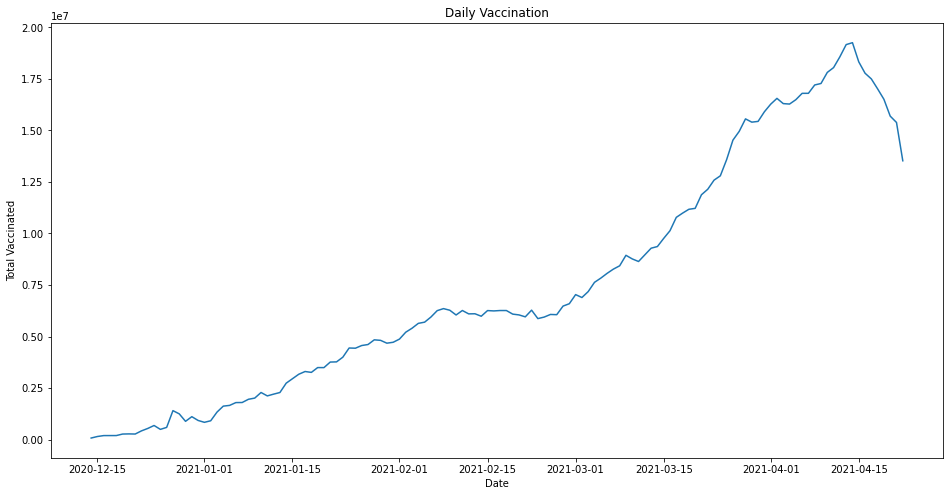

In [26]:
ts=data1.groupby(["date"])["daily_vaccinations"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Daily Vaccination')
plt.xlabel('Date')
plt.ylabel('Total Vaccinated')
plt.plot(ts);

In [27]:
sort_vaccine = data1.vaccines.value_counts().head(15)
sort_vaccine.head(15)

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         2701
Oxford/AstraZeneca                                                   2221
Oxford/AstraZeneca, Pfizer/BioNTech                                  1568
Pfizer/BioNTech                                                      1333
Moderna, Pfizer/BioNTech                                              534
Pfizer/BioNTech, Sinovac                                              503
Oxford/AstraZeneca, Sinopharm/Beijing                                 417
Sputnik V                                                             371
Oxford/AstraZeneca, Sinovac                                           362
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                          361
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     295
Sinopharm/Beijing                                                     258
Pfizer/BioNTech, Sinopharm/Beijing                                    244
Johnson&Johnson, Moderna, Oxford/Astra

In [28]:
vaccine_gp = data1.groupby(["vaccines"])
vac_gp_max = vaccine_gp.max()
max_vaccine = vac_gp_max.reset_index()
max_vaccine

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website,year,month
0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Mexico,MEX,2021-04-22,1.547752e+07,1.162287e+07,4978670.0,5.564730e+05,4.065280e+05,13.956761,10.306589,5.094706,3153.000000,Secretary of Health,https://www.gob.mx/cms/uploads/attachment/file...,2021,12
1,"CanSino, Sinopharm/Beijing, Sputnik V",Pakistan,PAK,2021-04-13,4.325183e+06,2.903580e+06,NaN,1.269432e+05,7.371984e+04,13.956761,10.306589,5.094706,2912.016436,National Command and Operation Centre,https://www.brecorder.com/news/amp/40084002,2021,4
2,"Covaxin, Oxford/AstraZeneca",India,IND,2021-04-22,1.327546e+08,1.135843e+08,19170339.0,4.265157e+06,3.659357e+06,13.956761,10.306589,5.094706,2912.016436,Government of India,https://dashboard.cowin.gov.in/,2021,4
3,"EpiVacCorona, Sputnik V",Russia,RUS,2021-04-22,1.721831e+07,1.078742e+07,6430894.0,5.728460e+05,3.452220e+05,13.956761,10.306589,5.094706,2912.016436,Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats,2021,12
4,Johnson&Johnson,South Africa,ZAF,2021-04-13,4.325183e+06,2.903580e+06,292623.0,1.269432e+05,7.371984e+04,13.956761,10.306589,5.094706,2912.016436,Ministry of Health,https://sacoronavirus.co.za/,2021,4
5,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Poland,POL,2021-04-22,9.806966e+06,7.311128e+06,2495838.0,3.116490e+05,1.888790e+05,25.910000,19.320000,8.640000,5054.000000,Ministry of Health,https://www.gov.pl/web/szczepimysie/raport-szc...,2021,12
6,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-04-22,2.189476e+08,1.357910e+08,89245776.0,4.629928e+06,3.384387e+06,65.470000,40.600000,26.680000,10120.000000,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,2021,12
7,"Moderna, Oxford/AstraZeneca",Honduras,HND,2021-04-21,4.325183e+06,2.903580e+06,2639.0,1.269432e+05,7.371984e+04,13.956761,10.306589,5.094706,2912.016436,Ministry of Health,https://proceso.hn/honduras-a-la-zaga-en-vacun...,2021,4
8,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Spain,RWA,2021-04-22,2.428691e+07,1.849638e+07,5790531.0,7.718680e+05,5.331930e+05,66.940000,45.720000,21.230000,12117.000000,Statens Serum Institute,https://www.terviseamet.ee/et/uudised/covid-19...,2021,12
9,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Hungary,HUN,2021-04-22,4.999342e+06,3.508846e+06,1490478.0,1.874880e+05,1.235760e+05,51.750000,36.320000,15.430000,12792.000000,Government of Hungary,https://koronavirus.gov.hu/cikkek/3-millio-509...,2021,12


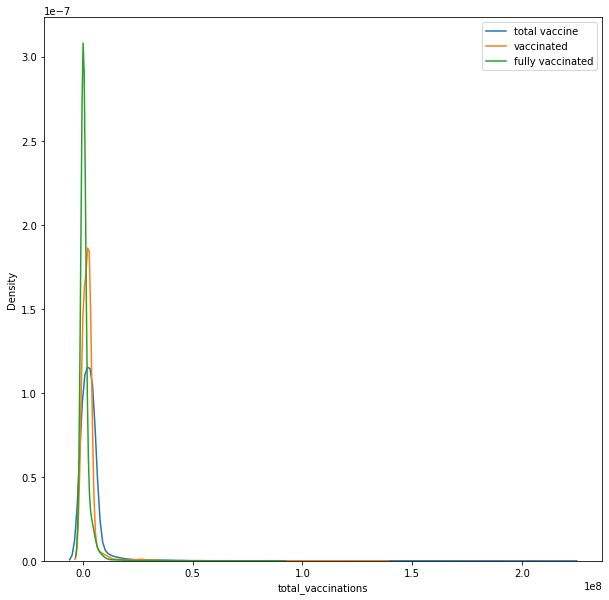

In [29]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=data1['total_vaccinations'], label='total vaccine')
sns.kdeplot(data=data1['people_vaccinated'], label = 'vaccinated')
sns.kdeplot(data=data1['people_fully_vaccinated'],label = 'fully vaccinated')
plt.legend()

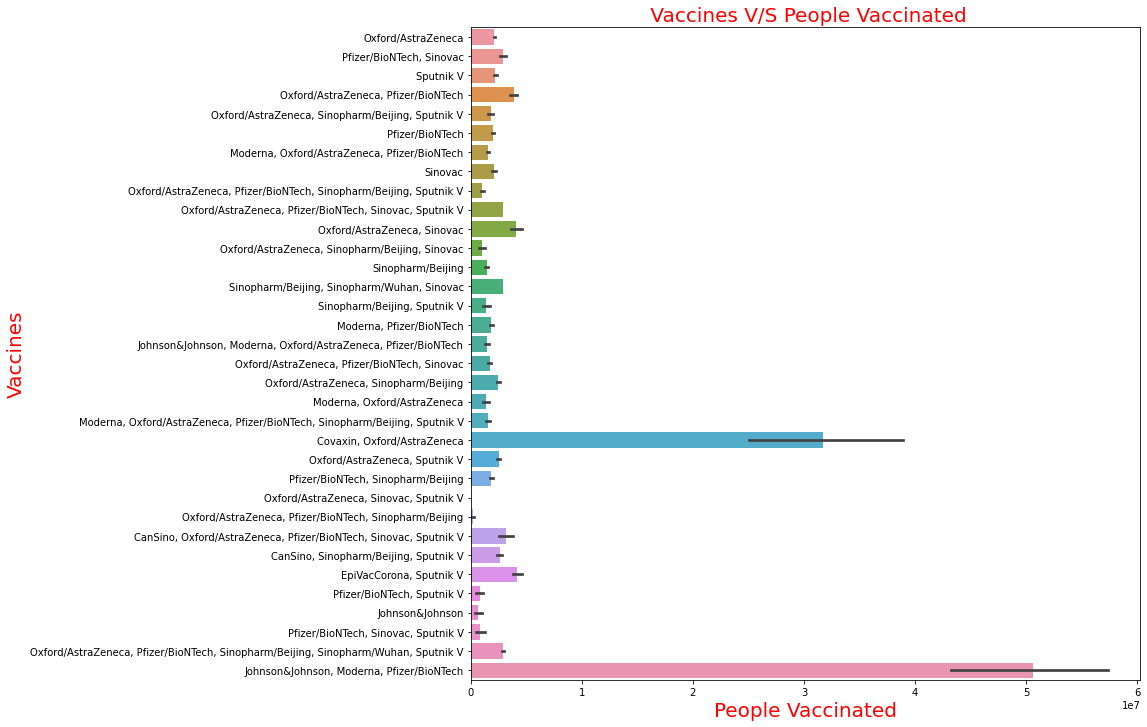

In [30]:
plt.figure(figsize=(12,12))
sns.barplot(y="vaccines", x= "people_vaccinated", data = data1)
plt.xlabel("People Vaccinated",color = "Red", fontsize=20)
plt.ylabel("Vaccines",color = "Red", fontsize=20)
plt.title(" Vaccines V/S People Vaccinated",color = "Red", fontsize=20)
plt.show()

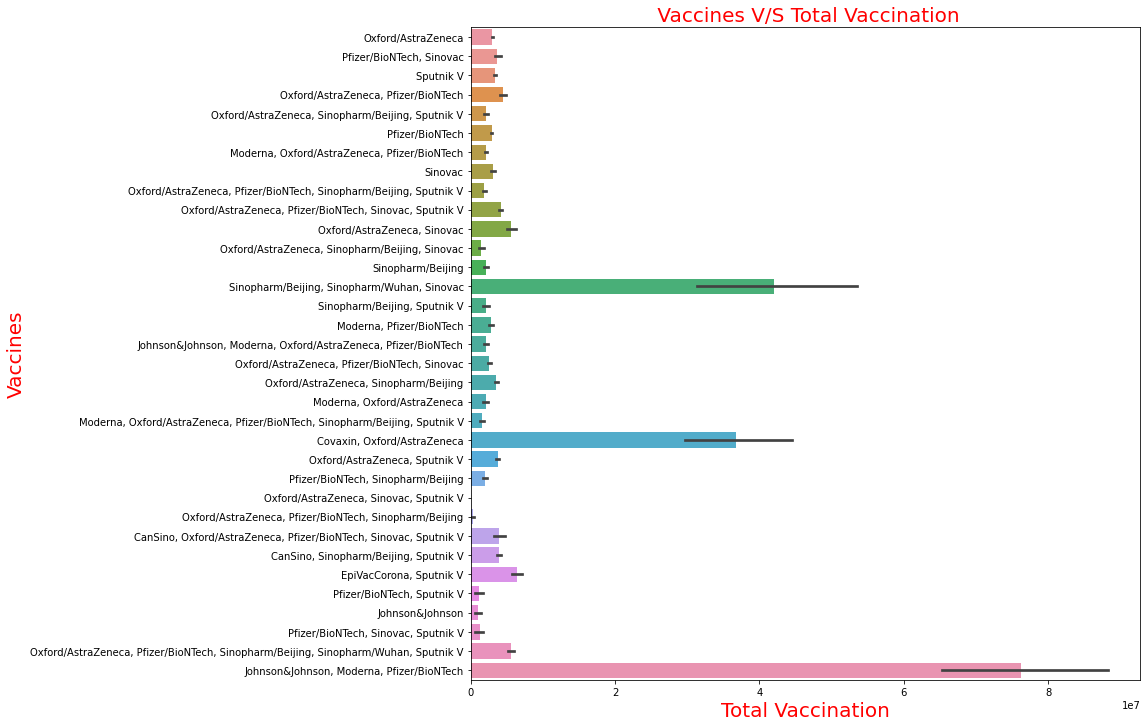

In [31]:
plt.figure(figsize=(12,12))
sns.barplot(x='total_vaccinations',y='vaccines',data=data1)
plt.xlabel("Total Vaccination",color = "Red", fontsize=20)
plt.ylabel("Vaccines",color = "Red", fontsize=20)
plt.title(" Vaccines V/S Total Vaccination",color = "Red", fontsize=20)
plt.show()

In [32]:
country_gp = data1.groupby(['country'])
country_gp_max = country_gp.max('people_vaccinated')
max_country = country_gp_max.reset_index()
max_country

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year,month
0,Afghanistan,4.325183e+06,2.903580e+06,NaN,126943.240109,73719.840914,13.956761,10.306589,5.094706,2912.016436,2021,4
1,Albania,4.325183e+06,2.903580e+06,655.0,126943.240109,73719.840914,13.956761,10.306589,5.094706,6028.000000,2021,4
2,Algeria,4.325183e+06,2.903580e+06,NaN,126943.240109,73719.840914,13.956761,10.306589,5.094706,2912.016436,2021,2
3,Andorra,4.325183e+06,2.903580e+06,4681.0,126943.240109,73719.840914,34.190000,28.130000,6.060000,15298.000000,2021,4
4,Angola,4.325183e+06,2.903580e+06,NaN,126943.240109,73719.840914,13.956761,10.306589,5.094706,2912.016436,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,4.325183e+06,2.903580e+06,NaN,126943.240109,73719.840914,13.956761,10.306589,5.094706,2912.016436,2021,4
189,Vietnam,1.286100e+05,1.286100e+05,NaN,126943.240109,73719.840914,0.130000,0.130000,5.094706,2912.016436,2021,4
190,Wales,4.325183e+06,2.903580e+06,635655.0,126943.240109,73719.840914,74.950000,54.790000,20.160000,10515.000000,2021,4
191,Zambia,4.325183e+06,2.903580e+06,NaN,126943.240109,73719.840914,13.956761,10.306589,5.094706,2912.016436,2021,4


<Figure size 2520x2520 with 0 Axes>

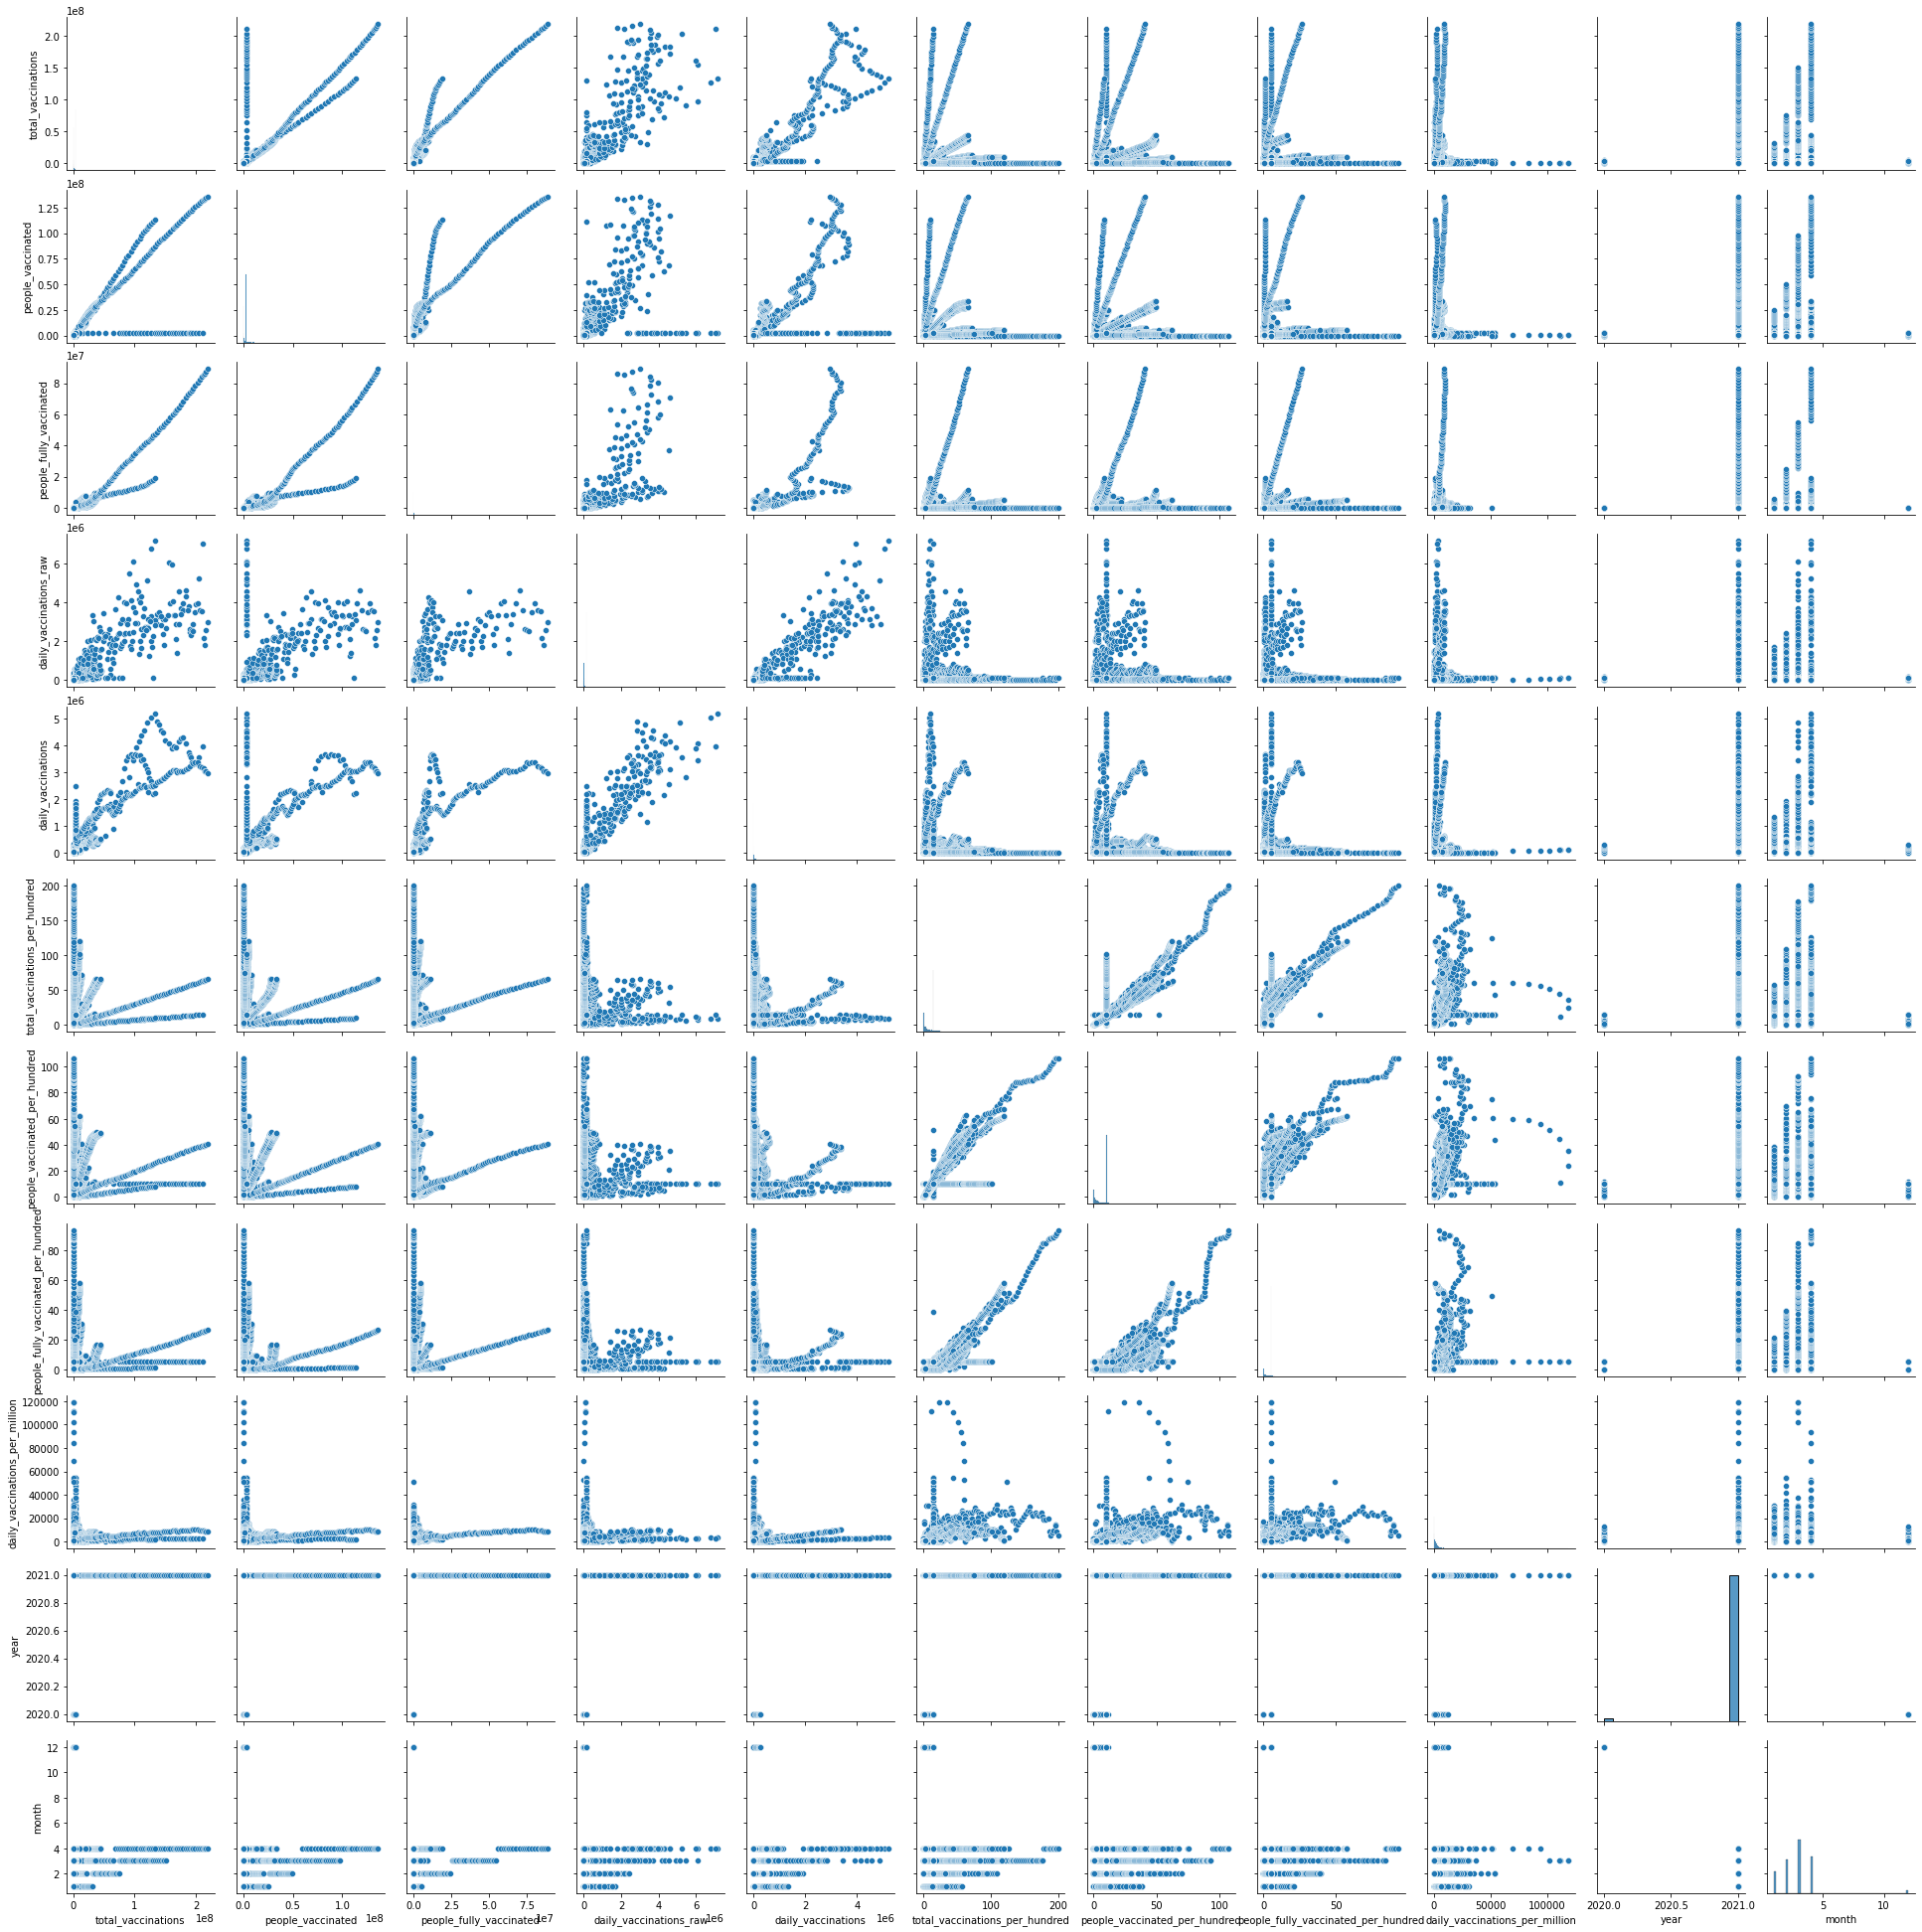

In [33]:
plt.figure(figsize=(35,35))
sns.pairplot(data=data1)

In [34]:
correlation = data1.corr()

<AxesSubplot:>

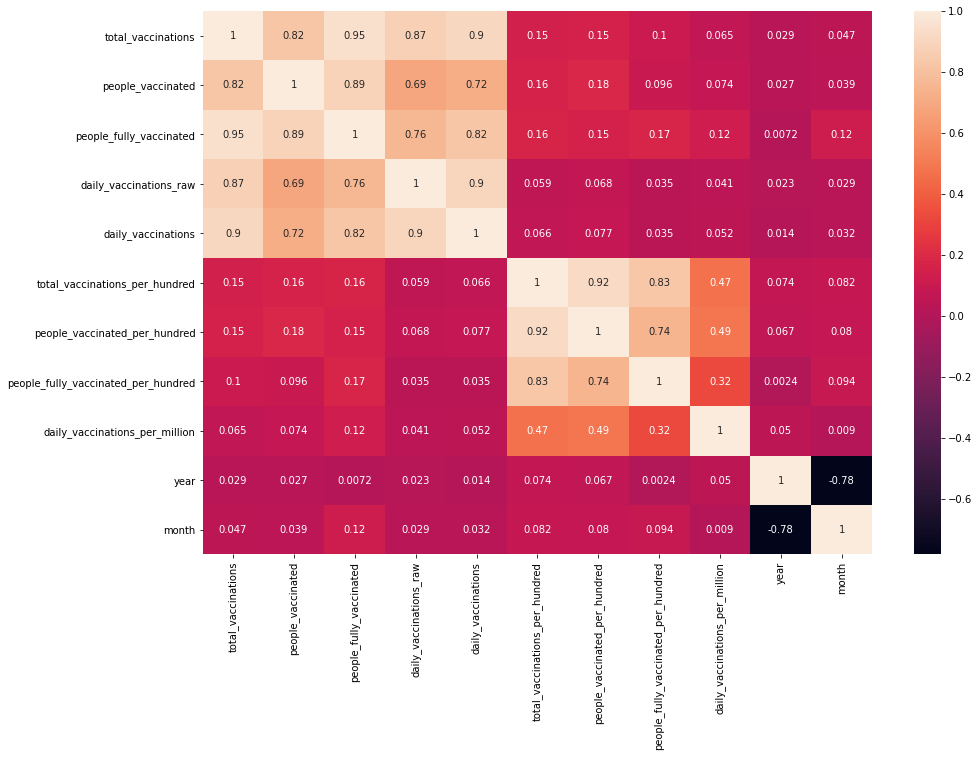

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)

<AxesSubplot:xlabel='total_vaccinations', ylabel='daily_vaccinations_per_million'>

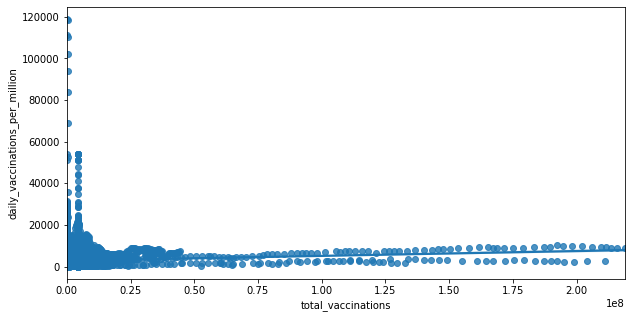

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x="total_vaccinations",y="daily_vaccinations_per_million", data=data1)

<Figure size 1440x1440 with 0 Axes>

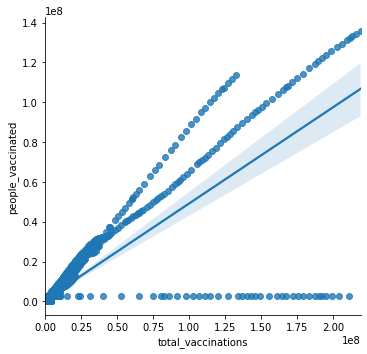

In [37]:
plt.figure(figsize=(20,20))
sns.lmplot(x='total_vaccinations',y='people_vaccinated',data=data1)